Problem Statement: The given dataset contains price of second-hand Hyundai grand i10 car with 
respect to year of making. Find the best linear relationship between year and 
price.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Importing libraries and dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/car_age_price.csv')
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
#data=data.reset_index().sort_values(by=['Year'])
#data.head()

In [5]:
#data.drop('index',axis=1,inplace=True)

In [6]:
data.shape

(112, 2)

In [7]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [8]:
data.dtypes

Year     int64
Price    int64
dtype: object

In [9]:
data.isna().sum()

Year     0
Price    0
dtype: int64

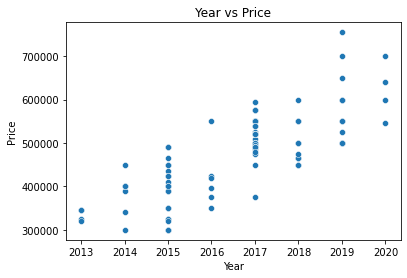

In [10]:
#Scatter plot
sns.scatterplot(x = "Year", y = "Price",data = data)
plt.title("Year vs Price")
plt.show();

In [11]:
#defining X and Y variables
x=data['Year'].values.reshape(-1,1)
y=data['Price'].values.reshape(-1,1)

In [12]:
# Perform 80 : 20 Train-Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=123,test_size=0.2)

In [13]:
# Observe the shapes
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((89, 1), (89, 1), (23, 1), (23, 1))

## 1. Linear Regression Model

In [14]:
#Model Trainig and predicting 
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred

array([[500375.58892302],
       [500375.58892302],
       [544465.56722482],
       [368105.65401764],
       [412195.63231944],
       [500375.58892302],
       [368105.65401764],
       [588555.54552661],
       [456285.61062123],
       [412195.63231944],
       [500375.58892302],
       [412195.63231944],
       [544465.56722482],
       [324015.67571585],
       [412195.63231944],
       [544465.56722482],
       [500375.58892302],
       [632645.5238284 ],
       [500375.58892302],
       [588555.54552661],
       [500375.58892302],
       [456285.61062123],
       [500375.58892302]])

In [15]:
#Model Evaluation
from sklearn.metrics import r2_score, mean_absolute_error , mean_squared_error

In [16]:
r_sqr = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("The R-squred value with sales is {} ".format(r_sqr))
print("Mean Absolute Error (MAE): {}".format(mae))
print("MSE with is {}".format(mse)) 
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse)))

The R-squred value with sales is 0.627315978949827 
Mean Absolute Error (MAE): 42677.91563675131
MSE with is 2864487598.2481527
Root Mean Squared Error (RMSE): 53520.90804767939


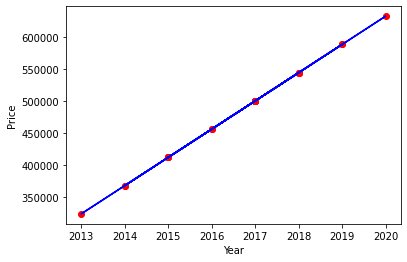

In [17]:
plt.scatter(x_test,y_pred,color='red')
plt.plot(x_test,y_pred,color='blue')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

### Predicting the possible price of a 2022 model second-hand grand i10 using Linear regression model

In [18]:
pred = lr.predict([[2022]])
pred

array([[720825.48043199]])

### 2. Lasso Regression Model

In [19]:
#Model Trainig and predicting 
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

In [20]:
#Moel Evaluation
r_sqr = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
print("The R-squred value with sales is {} ".format(r_sqr))
print("Mean Absolute Error (MAE): {}".format(mae))
print("MSE with is {}".format(mse)) 
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse))) 


The R-squred value with sales is 0.6273167858804423 
Mean Absolute Error (MAE): 42677.91563675131
MSE with is 2864481396.0967073
Root Mean Squared Error (RMSE): 53520.85010625959


### Predicting the possible price of a 2022 model second-hand grand i10 using Lasso regression model

In [21]:
pred=lasso.predict([[2022]])
pred

array([720823.39938572])

### **Remark** :  Value of every evaluation metric is almost same. Although since Lasso Regression Model has a slight decrease in MSE its considered to be best fitted than Linear Regression Model.